# Compute MeltingStripes

In [2]:
# initial "melting stripes" script based on sebastianbeyer's warming script from github (https://github.com/sebastianbeyer/warmingstripes)
import numpy as np
import matplotlib.pyplot as plt

#### load data from DWD

In [ ]:
## get data from file
## this one is from dwd
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P dwd-warmingstripes ftp://ftp-cdc.dwd.de/pub/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt

In [4]:
ls dwd-warmingstripes/pub/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt

dwd-warmingstripes/pub/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt


###### get data from file (no editing needed, we ditch the column with "year" and set delimiter to ";")

In [3]:
data = np.loadtxt("dwd-warmingstripes/pub/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt", delimiter=";", usecols = (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), skiprows=2)
# Zeitreihen fuer Gebietsmittel fuer Bundeslaender und Kombinationen von Bundeslaender, erstellt am: 20190402

#0: Jahr;
# skipped 1: Jahr;
#1: Brandenburg/Berlin;
#2: Brandenburg;
#3: Baden-Wuerttemberg;
#4: Bayern;
#5: Hessen;
#6: Mecklenburg-Vorpommern;
#7: Niedersachsen;
#8: Niedersachsen/Hamburg/Bremen;
#9: Nordrhein-Westfalen;
#10: Rheinland-Pfalz;
#11: Schleswig-Holstein;
#12: Saarland;
#13: Sachsen;
#14: Sachsen-Anhalt;
#15: Thueringen/Sachsen-Anhalt;
#16: Thueringen;
#17: Deutschland;

In [4]:
# Germany
data[:,17]

array([  7.3,   8.3,   7.9,   8.6,   7.7,   8. ,   7. ,   6.9,   7.4,
         7.3,   7.4,   7.5,   7.9,   8.1,   7.3,   7.6,   7.9,   8.5,
         8.1,   8.4,   7.6,   7.2,   8.4,   8.4,   8. ,   8.3,   7.8,
         7.5,   7.4,   8.4,   9. ,   7.9,   8.5,   8.5,   7.9,   8.4,
         7.5,   8.5,   7.3,   8.6,   9. ,   7.2,   8. ,   7.5,   8.3,
         8.7,   8. ,   8.3,   7.4,   8.8,   7.6,   8.3,   7.6,   9.5,
         8.4,   8.4,   8.6,   8.6,   8.3,   6.6,   7.2,   7.3,   8.9,
         8.3,   9. ,   8.4,   8.5,   9. ,   9.1,   8.6,   8.7,   7.9,
         8.9,   7.7,   7.5,   6.8,   8.6,   8.2,   9. ,   8.4,   8.9,
         7.1,   7.1,   8.1,   7.5,   8.5,   8.9,   8.1,   7.8,   7.7,
         8.4,   7.8,   8.2,   8.8,   8.9,   8.5,   8.7,   7.8,   7.7,
         7.6,   8.2,   8.9,   9. ,   8. ,   7.4,   7.9,   7.4,   9.1,
         9.5,   9.5,   8.3,   9.4,   8.5,   9.7,   8.9,   7.2,   8.9,
         9.1,   9.5,   9.9,   9. ,   9.6,   9.4,   8.9,   9. ,   9.5,
         9.9,   9.5,

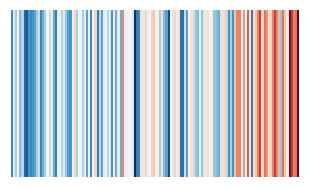

In [5]:
temps_bremen = data[:,8]
temps_berlin_brandenburg= data[:,1]
temps_germany = data[:,17]

## stack data to be able to plot them with imshow
temps = temps_germany
# temps = temps_bremen
# temps = temps_berlin_brandenburg

stacked_temps = np.stack((temps, temps))

vmin = 5.9
vmax = 11


## plotting
###############
plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

plt.savefig("stripes_germany.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

### NEW: now let's do the melting stripes

#### load NSIDC data

In [8]:
# Northern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P nsidc-sea-ice-index-2019 ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/ 

2019-04-18 11:48:25 URL: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/ [1139] -> "nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/north/monthly/data/.listing" [1]
BEENDET --2019-04-18 11:48:25--
Geholt: 1 Dateien, 1,1K in 0s (2122 GB/s)


In [9]:
# Southern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P nsidc-sea-ice-index-2019 ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/data/

2019-04-18 11:48:27 URL: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/south/monthly/data/ [1139] -> "nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/south/monthly/data/.listing" [1]
BEENDET --2019-04-18 11:48:27--
Geholt: 1 Dateien, 1,1K in 0s (2122 GB/s)


In [10]:
!ls nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/north/monthly/data/
!ls nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/south/monthly/data/

N_01_extent_v3.0.csv  N_05_extent_v3.0.csv  N_09_extent_v3.0.csv
N_02_extent_v3.0.csv  N_06_extent_v3.0.csv  N_10_extent_v3.0.csv
N_03_extent_v3.0.csv  N_07_extent_v3.0.csv  N_11_extent_v3.0.csv
N_04_extent_v3.0.csv  N_08_extent_v3.0.csv  N_12_extent_v3.0.csv
S_01_extent_v3.0.csv  S_05_extent_v3.0.csv  S_09_extent_v3.0.csv
S_02_extent_v3.0.csv  S_06_extent_v3.0.csv  S_10_extent_v3.0.csv
S_03_extent_v3.0.csv  S_07_extent_v3.0.csv  S_11_extent_v3.0.csv
S_04_extent_v3.0.csv  S_08_extent_v3.0.csv  S_12_extent_v3.0.csv


##### start with Arctic September sea ice extent

In [11]:
# how does the file look like?
!head -20 nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/north/monthly/data/N_09_extent_v3.0.csv

year, mo,    data-type, region, extent,   area
1979,  9,      Goddard,      N,   7.05,   4.58
1980,  9,      Goddard,      N,   7.67,   4.87
1981,  9,      Goddard,      N,   7.14,   4.44
1982,  9,      Goddard,      N,   7.30,   4.43
1983,  9,      Goddard,      N,   7.39,   4.70
1984,  9,      Goddard,      N,   6.81,   4.11
1985,  9,      Goddard,      N,   6.70,   4.23
1986,  9,      Goddard,      N,   7.41,   4.72
1987,  9,      Goddard,      N,   7.28,   5.64
1988,  9,      Goddard,      N,   7.37,   5.36
1989,  9,      Goddard,      N,   7.01,   4.86
1990,  9,      Goddard,      N,   6.14,   4.55
1991,  9,      Goddard,      N,   6.47,   4.51
1992,  9,      Goddard,      N,   7.47,   5.43
1993,  9,      Goddard,      N,   6.40,   4.58
1994,  9,      Goddard,      N,   7.14,   5.13
1995,  9,      Goddard,      N,   6.08,   4.43
1996,  9,      Goddard,      N,   7.58,   5.62
1997,  9,      Goddard,      N,   6.69,   4.89


In [6]:
import csv

#-- NH SEPTEMBER
NSIDC_NH_SEP_year=np.empty(0)
NSIDC_NH_SEP_data=np.empty(0)

with open('nsidc-sea-ice-index-2019/DATASETS/NOAA/G02135/north/monthly/data/N_09_extent_v3.0.csv', 'rb') as csvfile:
    header = [h.strip() for h in csvfile.next().split(',')] # get rid off the white spaces in keywords
    reader = csv.DictReader(csvfile, fieldnames=header, delimiter=',') # these elements become the keys of the resulting dictionary
    #reader = csv.DictReader(csvfile, delimiter=',') # uses first line for fieldnames by default with white spaces  
        
    for line in reader:
        NSIDC_NH_SEP_data=np.append(NSIDC_NH_SEP_data,float(line['extent']))
        NSIDC_NH_SEP_year=np.append(NSIDC_NH_SEP_year,float(line['year'])) 

In [7]:
NSIDC_NH_SEP_year
extent=NSIDC_NH_SEP_data
NSIDC_NH_SEP_data.max()

7.6699999999999999

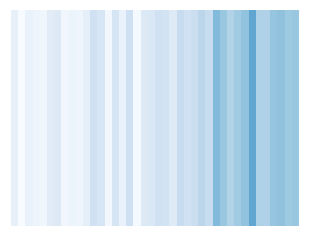

In [8]:
stacked_extent = np.stack((extent, extent))

vmin=0
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("meltingstripes_NH09_vmin0.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

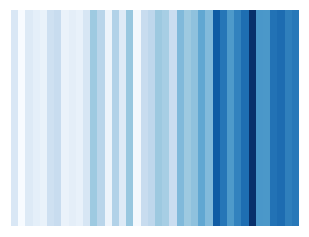

In [9]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("meltingstripes_NH09_realvmin.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

In [10]:
extent.min()

3.5699999999999998

### now get the AWI sea ice portal data

In [20]:
# Northern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P AWI-sea-ice-portal-2019 http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_n.txt 

2019-04-18 11:55:15 URL:http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_n.txt [640/640] -> "AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt" [1]
BEENDET --2019-04-18 11:55:15--
Geholt: 1 Dateien, 640 in 0s (1192 GB/s)


In [24]:
# how does the file look like?
!head -20 AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt

1979; 7084280.7
1980; 7705765.0
1981; 7164405.7
1982; 7330477.0
1983; 7414369.7
1984; 6888417.3
1985; 6727139.3
1986; 7424643.0
1987; 7278088.0
1988; 7372253.0
1989; 7006209.0
1990; 6126882.7
1991; 6464164.0
1992; 7472581.0
1993; 6374450.7
1994; 7128452.0
1995; 6058400.0
1996; 7580099.7
1997; 6674749.0
1998; 6518607.0


In [11]:
AWIdata = np.loadtxt("AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt", delimiter=";", usecols = (0,1))

In [12]:
extent=AWIdata[:,1]/10**6 # million km2

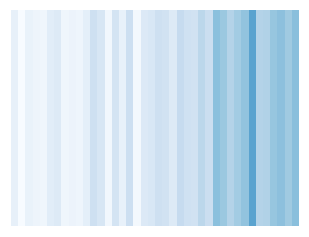

In [13]:
stacked_extent = np.stack((extent, extent))

vmin=0
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_vmin0.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

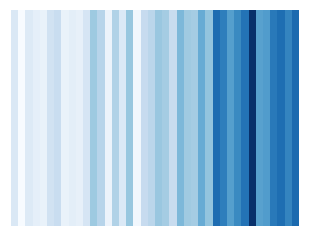

In [14]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_realvmin.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

In [15]:
extent.min(), extent.max()

(3.4878372999999998, 7.7057650000000004)

#### Add a colorbar for internal use

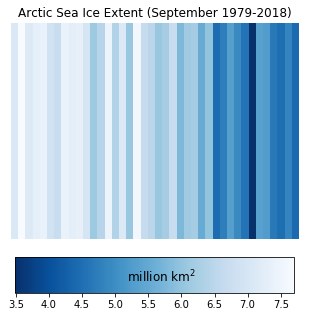

In [96]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

fig=plt.figure(figsize=(4,5))
ax1 = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)
plt.title("Arctic Sea Ice Extent (September 1979-2018)",fontsize=12)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Now adding the colorbar
cbaxes = fig.add_axes([0.015, 0.05, 0.97, 0.1]) # left, top, width, height
cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
plt.text(0.4,0.3,'million km$^2$',fontsize=12)

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_colorbar.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

#### Meanwhile in Antarctica...

In [98]:
# Southern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P AWI-sea-ice-portal-2019 http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_s.txt 

2019-04-29 11:05:56 URL:http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_s.txt [640/640] -> "AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_s.txt" [1]
BEENDET --2019-04-29 11:05:56--
Geholt: 1 Dateien, 640 in 0s (1192 GB/s)


In [99]:
AWIdata_S = np.loadtxt("AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_s.txt", delimiter=";", usecols = (0,1))

In [100]:
extent_S=AWIdata_S[:,1]/10**6 # million km2

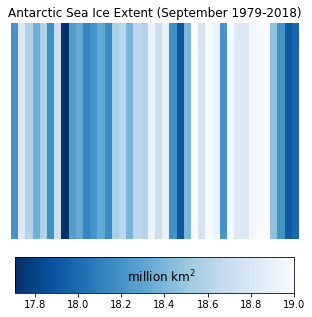

In [114]:
stacked_extent = np.stack((extent_S, extent_S))

vmin=extent_S.min()
vmax=19.0 # shows more details than extent_S.max()

## plotting
###############

fig=plt.figure(figsize=(4,5))
ax1 = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)
plt.title("Antarctic Sea Ice Extent (September 1979-2018)",fontsize=12)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Now adding the colorbar
cbaxes = fig.add_axes([0.015, 0.05, 0.97, 0.1]) # left, top, width, height
cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
plt.text(0.4,0.3,'million km$^2$',fontsize=12)

plt.show()

#plt.savefig("AWI_meltingstripes_SH09_colorbar.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)